In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

df = pd.read_json('Rfah_3recycles.json.zip')

def get_type(pdb):
    end = pdb.split('_')[-1]
    if end=='REF.pdb':
        return 'REF'
    elif end.startswith('U'):
        return end.split('-')[0]
    else:
        return 'Tree'
    
df['Type'] = df.apply(lambda row: get_type(row['pdb']), axis=1)

df = df.loc[df.Type=='Tree']

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


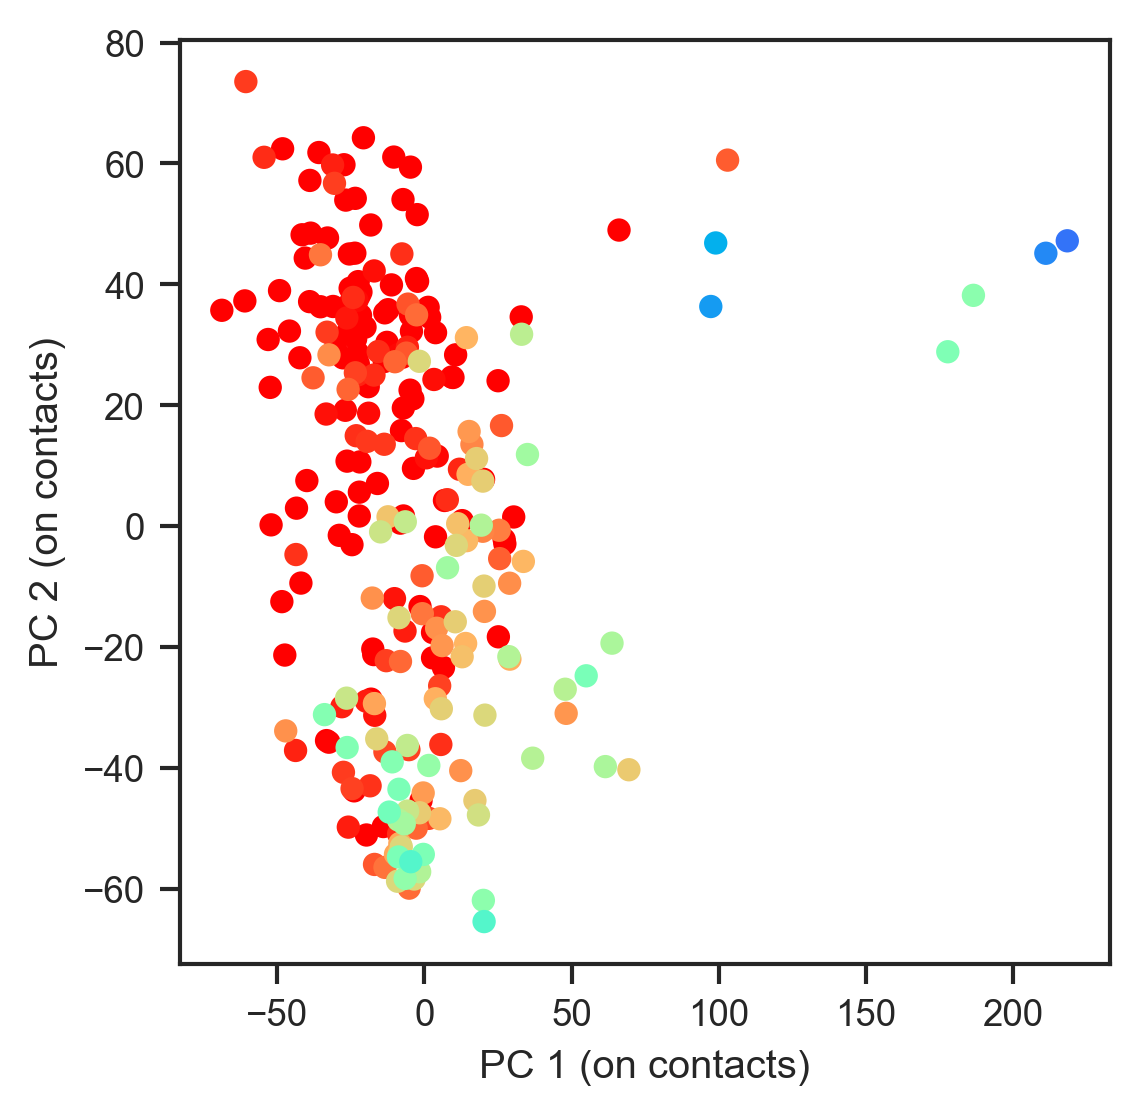

In [3]:
figure(figsize=(4,4))
df = df.sort_values('mean_pLDDT')
scatter(df['PC 1'], df['PC 2'], c=df['mean_pLDDT'], cmap='rainbow_r',vmin=50, vmax=90)

xlabel('PC 1 (on contacts)')
ylabel('PC 2 (on contacts)')

savefig('rfah_landscape.pdf',bbox_inches='tight')